##### La empresa está interesada en hacer crecer el canal de venta online, para eso es necesario entender cuáles son los factores determinantes para que una venta se realice por medio de ese canal. Se sugiere utilizar Random Forest como modelo para clasificación de ventas online

In [107]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [108]:
df_venta = pd.read_csv('Datasets/Venta_Procesado.csv')
df_venta.head()
#IdCanal = 2 Es el canal de venta Online

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad,MinPrecio,MaxPrecio,MinCantidad,MaxCantidad,Calidad_Precio,Calidad_Cantidad,Venta,Fecha_Año,Fecha_Mes,Fecha_Periodo
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0,813.12,813.12,0.000,5.000,Sin errores,Sin errores,1626.24,2018,3,201803
1,2,2018-12-28,2018-12-29,2,884,13,1674,42795,543.18,3.0,543.18,543.18,0.875,3.125,Sin errores,Sin errores,1629.54,2018,12,201812
2,3,2016-03-28,2016-03-31,2,1722,13,1674,42837,430.32,1.0,430.32,430.32,0.000,5.000,Sin errores,Sin errores,430.32,2016,3,201603
3,4,2017-10-23,2017-10-24,3,2876,13,1674,42834,818.84,2.0,818.84,818.84,0.500,3.500,Sin errores,Sin errores,1637.68,2017,10,201710
4,5,2017-11-22,2017-11-25,2,678,13,1674,42825,554.18,3.0,554.18,554.18,0.000,5.000,Sin errores,Sin errores,1662.54,2017,11,201711


In [109]:
df_venta = df_venta[(df_venta['Calidad_Precio'] == 'Sin errores') & (df_venta['Calidad_Cantidad'] == 'Sin errores')]

In [110]:
df_venta.shape

(39792, 20)

In [111]:
df_venta.drop(['IdVenta','Fecha','Fecha_Entrega','IdEmpleado','MinPrecio','MaxPrecio','MinCantidad','MaxCantidad','Calidad_Precio','Calidad_Cantidad','Venta','Fecha_Periodo'],axis=1, inplace = True)

In [112]:
df_venta.head()

,IdCanal,IdCliente,IdSucursal,IdProducto,Precio,Cantidad,Fecha_Año,Fecha_Mes
0,3,969,13,42817,813.12,2.0,2018,3
1,2,884,13,42795,543.18,3.0,2018,12
2,2,1722,13,42837,430.32,1.0,2016,3
3,3,2876,13,42834,818.84,2.0,2017,10
4,2,678,13,42825,554.18,3.0,2017,11


##### Se lee el Maestro de Clientes para tomar Latitud, Longitud y Edad

In [113]:
df_cliente = pd.read_csv('Datasets/Clientes.csv', sep=';')
df_cliente.head()

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10
0,1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,42-5161,58,LOMA VERDE,"-58,81850307","-34,30997088",NaN
1,2,Buenos Aires,ANA SAPRIZA,PUEYRREDON Y DUPUY RUTA3 KM 52.500 S/N BÂº LO...,49-7578,61,SANTA ROSA,"-58,73073751","-34,93908311",NaN
2,3,Buenos Aires,FERNANDO LUIS SARALEGUI,CALDERON DE LA BARCA 498,49-3435,15,TORRES,"-59,12794068","-34,43082199",NaN
3,4,Buenos Aires,MANUELA SARASOLA,"RUTA 36 KM 45,500 S/N EL PELIGRO",49-2883,29,RUTA SOL,"-58,14393954","-34,92052706",NaN
4,5,Buenos Aires,MARIO RAÚL SARASUA,492 Y 186 S/N COLONIA URQUIZA,491-4608,34,JOSE MELCHOR ROMERO,"-58,089381","-34,9444471",NaN


In [114]:
df_cliente.drop(['Provincia','Nombre_y_Apellido','Domicilio','Telefono','Localidad','col10'], axis=1, inplace = True)
df_cliente.head()

,ID,Edad,X,Y
0,1,58,"-58,81850307","-34,30997088"
1,2,61,"-58,73073751","-34,93908311"
2,3,15,"-59,12794068","-34,43082199"
3,4,29,"-58,14393954","-34,92052706"
4,5,34,"-58,089381","-34,9444471"


##### Se lee el Maestro de Sucursales para Obtener Latitudy Longitud

In [115]:
df_sucursal = pd.read_csv('Datasets/Sucursales.csv', sep=';')
df_sucursal.head()

,ID,Sucursal,Direccion,Localidad,Provincia,Latitud,Longitud
0,1,Cabildo,Av. Cabildo 1342,Ciudad de Buenos Aires,Ciudad de Buenos Aires,"-34,5678060","-58,4495720"
1,2,Palermo 1,Guatemala 5701,CABA,CABA,"-34,5790350","-58,4335660"
2,3,Palermo 2,Gral. Lucio Norberto Mansilla 2668,CABA,C deBuenos Aires,"-34,5959660","-58,4051500"
3,4,Corrientes,Av. Corrientes 2352,Ciudad de Buenos Aires,Bs As,"-34,6046850","-58,3987640"
4,5,Almagro,Venezuela 3650,Capital,Bs.As.,"-34,6173080","-58,4161790"


In [116]:
df_sucursal.drop(['Sucursal', 'Direccion', 'Localidad', 'Provincia'], axis=1, inplace = True)

In [117]:
df_sucursal.head()

,ID,Latitud,Longitud
0,1,"-34,5678060","-58,4495720"
1,2,"-34,5790350","-58,4335660"
2,3,"-34,5959660","-58,4051500"
3,4,"-34,6046850","-58,3987640"
4,5,"-34,6173080","-58,4161790"


In [118]:
df_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3407 entries, 0 to 3406
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3407 non-null   int64 
 1   Edad    3407 non-null   int64 
 2   X       3345 non-null   object
 3   Y       3347 non-null   object
dtypes: int64(2), object(2)
memory usage: 106.6+ KB


In [119]:
df_sucursal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        31 non-null     int64 
 1   Latitud   31 non-null     object
 2   Longitud  31 non-null     object
dtypes: int64(1), object(2)
memory usage: 872.0+ bytes


In [120]:
from geopy.distance import geodesic

In [121]:
punto1 = (-34.61315, -58.37723)
punto2 = (25.2807, 51.5217)

In [122]:
print(geodesic(punto1, punto2).km)

13311.533435454943


##### Hacemos retoques al dataframe de cliente

In [123]:
df_cliente.rename(columns = {'ID' : 'IdCliente','Edad' : 'Edad', 'X' : 'Lat_Cliente', 'Y' : 'Lon_Cliente'}, inplace = True)

In [124]:
df_cliente.head()

,IdCliente,Edad,Lat_Cliente,Lon_Cliente
0,1,58,"-58,81850307","-34,30997088"
1,2,61,"-58,73073751","-34,93908311"
2,3,15,"-59,12794068","-34,43082199"
3,4,29,"-58,14393954","-34,92052706"
4,5,34,"-58,089381","-34,9444471"


In [125]:
df_cliente.dropna(inplace= True)

In [126]:
df_cliente.shape

(3333, 4)

##### Cambiamos comas por puntos, para que no nos genere problemas a la hora de cuantificar distancias

In [127]:
df_cliente['Lat_Cliente'] = df_cliente.apply(lambda row: str(row['Lat_Cliente']).replace(',','.'), axis=1)
df_cliente['Lon_Cliente'] = df_cliente.apply(lambda row: str(row['Lon_Cliente']).replace(',','.'), axis=1)

In [128]:
df_cliente = df_cliente.astype({'Lat_Cliente' : np.float16, 'Lon_Cliente' : np.float16})

In [129]:
df_cliente.describe()

,IdCliente,Edad,Lat_Cliente,Lon_Cliente
count,3333.000000,3333.000000,3333.000000,3333.000000
mean,1710.688269,40.412241,-inf,-inf
std,985.695497,14.577355,14.320312,8.640625
min,1.000000,15.000000,-71.500000,-68.812500
25%,858.000000,28.000000,-60.906250,-34.718750
50%,1721.000000,41.000000,-58.625000,-34.593750
75%,2567.000000,53.000000,-58.437500,-32.937500
max,3407.000000,65.000000,58.843750,34.937500


##### Hacemos retoques al dataframe de sucursal

In [130]:
df_sucursal.head()

,ID,Latitud,Longitud
0,1,"-34,5678060","-58,4495720"
1,2,"-34,5790350","-58,4335660"
2,3,"-34,5959660","-58,4051500"
3,4,"-34,6046850","-58,3987640"
4,5,"-34,6173080","-58,4161790"


In [131]:
df_sucursal.rename(columns ={'ID' : 'IdSucursal', 'Latitud' : 'Lat_Sucursal', 'Longitud' : 'Lon_Sucursal'},inplace = True)

In [132]:
df_sucursal['Lat_Sucursal'] = df_sucursal.apply(lambda row: str(row['Lat_Sucursal']).replace(',','.'), axis = 1)
df_sucursal['Lon_Sucursal'] = df_sucursal.apply(lambda row: str(row['Lon_Sucursal']).replace(',','.'), axis = 1)

In [133]:
df_sucursal.astype({'Lat_Sucursal' : np.float16, 'Lon_Sucursal' : np.float16})

,IdSucursal,Lat_Sucursal,Lon_Sucursal
0,1,-34.562500,-58.43750
1,2,-34.593750,-58.43750
2,3,-34.593750,-58.40625
3,4,-34.593750,-58.40625
4,5,-34.625000,-58.40625
5,6,-34.625000,-58.43750
6,7,-34.625000,-58.43750
7,8,-34.625000,-58.43750
8,9,-34.625000,-58.46875
9,10,-34.625000,-58.50000


##### Como vemos tenemos valores de latitud y longitud que no corresponden a Argentina, se procede a hacer correcciones, las cuáles serán de dos tipos:
* Casos donde la latitud y longitud están en positivo
* Casos donde la latitud y longitud están intercambiadas

In [134]:
df_cliente['Lon_Cliente'] = df_cliente['Lon_Cliente'].apply(lambda x: x if x < 0 else x * -1)
df_cliente['Lat_Cliente'] = df_cliente['Lat_Cliente'].apply(lambda x: x if x < 0 else x * -1)

In [135]:
df_cliente.describe()

,IdCliente,Edad,Lat_Cliente,Lon_Cliente
count,3333.000000,3333.000000,3333.000000,3333.000000
mean,1710.688269,40.412241,-60.300119,-34.080202
std,985.695497,14.577355,4.621252,3.609896
min,1.000000,15.000000,-71.500000,-68.812500
25%,858.000000,28.000000,-60.906250,-34.718750
50%,1721.000000,41.000000,-58.656250,-34.593750
75%,2567.000000,53.000000,-58.437500,-32.968750
max,3407.000000,65.000000,-26.734375,-26.593750


In [136]:
df_cliente['Lat_Cliente_Aux'] = df_cliente['Lat_Cliente']

In [137]:
df_cliente['Lat_Cliente'] = df_cliente.apply(lambda row: row['Lat_Cliente'] if row['Lat_Cliente_Aux'] > -55 else row['Lon_Cliente'], axis=1)

In [138]:
df_cliente['Lon_Cliente'] = df_cliente.apply(lambda row: row['Lon_Cliente'] if row['Lat_Cliente_Aux'] > -55 else row['Lat_Cliente_Aux'], axis=1)

In [139]:
df_cliente.describe()

,IdCliente,Edad,Lat_Cliente,Lon_Cliente,Lat_Cliente_Aux
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1710.688269,40.412241,-33.746386,-60.633935,-60.300119
std,985.695497,14.577355,1.988432,3.563706,4.621252
min,1.000000,15.000000,-40.375000,-71.500000,-71.500000
25%,858.000000,28.000000,-34.718750,-63.968750,-60.906250
50%,1721.000000,41.000000,-34.593750,-58.656250,-58.656250
75%,2567.000000,53.000000,-32.968750,-58.437500,-58.437500
max,3407.000000,65.000000,-26.593750,-57.750000,-26.734375


In [140]:
df_cliente.drop(columns=['Lat_Cliente_Aux'], inplace=True)

##### Se agrega en el dataframe de ventas los datos de geoposición y edad

In [141]:
df_venta = pd.merge(df_venta, df_cliente, on='IdCliente', how='left')

In [142]:
df_venta = pd.merge(df_venta, df_sucursal, on='IdSucursal', how='left')

In [143]:
df_venta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39792 entries, 0 to 39791
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IdCanal       39792 non-null  int64  
 1   IdCliente     39792 non-null  int64  
 2   IdSucursal    39792 non-null  int64  
 3   IdProducto    39792 non-null  int64  
 4   Precio        39792 non-null  float64
 5   Cantidad      39792 non-null  float64
 6   Fecha_Año     39792 non-null  int64  
 7   Fecha_Mes     39792 non-null  int64  
 8   Edad          38765 non-null  float64
 9   Lat_Cliente   38765 non-null  float64
 10  Lon_Cliente   38765 non-null  float64
 11  Lat_Sucursal  39792 non-null  object 
 12  Lon_Sucursal  39792 non-null  object 
dtypes: float64(5), int64(6), object(2)
memory usage: 4.3+ MB


##### Eliminamos Valores nulos

In [144]:
df_venta.dropna(inplace = True)
df_venta.shape

(38765, 13)

##### Se genera el campo donde va a estar la distancia del cliente con la sucursal, que es la geodésica entre los dos puntos de coordenadas

In [145]:
df_venta['Dist_Cli_Suc'] = df_venta.apply(lambda row: geodesic((row['Lat_Cliente'], row['Lon_Cliente']),(row['Lat_Sucursal'], row['Lon_Sucursal'])).km, axis=1)

In [146]:
df_venta.describe()

,IdCanal,IdCliente,IdSucursal,IdProducto,Precio,Cantidad,Fecha_Año,Fecha_Mes,Edad,Lat_Cliente,Lon_Cliente,Dist_Cli_Suc
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000,38765.00000,38765.000000
mean,2.016252,1512.787747,14.802476,42899.143016,1260.362639,2.005237,2017.604102,6.339404,40.436089,-34.028709,-60.44751,330.520783
std,0.743627,975.959580,8.887017,83.619297,1371.335361,0.672206,1.743889,3.457824,14.603877,1.864586,3.70878,399.963815
min,1.000000,1.000000,1.000000,42737.000000,3.000000,1.000000,2015.000000,1.000000,15.000000,-40.375000,-71.50000,0.265733
25%,1.000000,701.000000,7.000000,42830.000000,438.000000,2.000000,2016.000000,3.000000,28.000000,-34.750000,-59.18750,21.333974
50%,2.000000,1368.000000,15.000000,42899.000000,638.660000,2.000000,2018.000000,6.000000,41.000000,-34.625000,-58.62500,58.491570
75%,3.000000,2295.000000,23.000000,42972.000000,1765.000000,2.000000,2019.000000,9.000000,53.000000,-34.156250,-58.40625,639.076157
max,3.000000,3407.000000,31.000000,43043.000000,9555.040000,3.000000,2020.000000,12.000000,65.000000,-26.593750,-57.75000,1696.819980


El Canal de venta Online es el IdCanal = 2, se observan los datos con ese filtro

In [147]:
df_venta[df_venta['IdCanal'] == 2].describe()

,IdCanal,IdCliente,IdSucursal,IdProducto,Precio,Cantidad,Fecha_Año,Fecha_Mes,Edad,Lat_Cliente,Lon_Cliente,Dist_Cli_Suc
count,17319.0,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000
mean,2.0,1508.906288,15.231191,42898.372135,1255.929920,2.010913,2018.348577,6.247243,40.611063,-34.024073,-60.445154,344.129966
std,0.0,981.534448,8.794534,83.041656,1382.290341,0.676897,1.574875,3.458741,14.640690,1.857701,3.699921,398.919891
min,2.0,1.000000,1.000000,42737.000000,3.000000,1.000000,2015.000000,1.000000,15.000000,-40.375000,-71.500000,0.265733
25%,2.0,682.000000,7.000000,42830.000000,437.000000,2.000000,2017.000000,3.000000,28.000000,-34.750000,-59.187500,22.792257
50%,2.0,1362.000000,15.000000,42898.000000,643.000000,2.000000,2019.000000,6.000000,41.000000,-34.625000,-58.625000,72.709598
75%,2.0,2307.500000,23.000000,42971.000000,1748.780000,2.000000,2020.000000,9.000000,54.000000,-34.156250,-58.406250,636.952945
max,2.0,3407.000000,31.000000,43043.000000,9555.040000,3.000000,2020.000000,12.000000,65.000000,-26.593750,-57.750000,1696.819980


In [148]:
df_venta['VentaOnline'] = df_venta.apply(lambda row: 1 if row['IdCanal'] == 2 else 0, axis=1)

Del maestro de Productos, se obtiene el tipo de producto

In [149]:
df_producto = pd.read_csv("Datasets/Productos.csv", sep=",", encoding="ansi")

In [150]:
df_producto.drop(['Concepto','Precio'], axis=1,inplace=True)

In [151]:
df_producto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID_PRODUCTO  291 non-null    int64 
 1   Tipo         279 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [152]:
df_producto.rename(columns = {'ID_PRODUCTO': 'IdProducto'}, inplace = True)

In [153]:
df_producto.dropna(inplace=True)

In [154]:
df_producto.Tipo.unique()

array(['IMPRESIÓN', 'INFORMATICA', 'GRABACION', 'GABINETES', 'AUDIO',
       'GAMING', 'LIMPIEZA', 'BASES', 'VARIOS', 'ESTUCHERIA'],
      dtype=object)

In [155]:
from sklearn import preprocessing

In [156]:
le = preprocessing.LabelEncoder()

In [157]:
df_producto['IdTipoProducto'] = le.fit_transform(df_producto.Tipo.values)

In [158]:
df_producto.head()

,IdProducto,Tipo,IdTipoProducto
0,42737,IMPRESIÓN,6
1,42754,INFORMATICA,7
2,42755,INFORMATICA,7
3,42756,INFORMATICA,7
4,42757,INFORMATICA,7


In [159]:
df_producto.drop(['Tipo'], axis=1,inplace=True)

In [160]:
df_venta = pd.merge(df_venta, df_producto, on='IdProducto', how='left')

In [161]:
df_venta.dropna(inplace = True)

In [162]:
df_venta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38226 entries, 0 to 38764
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IdCanal         38226 non-null  int64  
 1   IdCliente       38226 non-null  int64  
 2   IdSucursal      38226 non-null  int64  
 3   IdProducto      38226 non-null  int64  
 4   Precio          38226 non-null  float64
 5   Cantidad        38226 non-null  float64
 6   Fecha_Año       38226 non-null  int64  
 7   Fecha_Mes       38226 non-null  int64  
 8   Edad            38226 non-null  float64
 9   Lat_Cliente     38226 non-null  float64
 10  Lon_Cliente     38226 non-null  float64
 11  Lat_Sucursal    38226 non-null  object 
 12  Lon_Sucursal    38226 non-null  object 
 13  Dist_Cli_Suc    38226 non-null  float64
 14  VentaOnline     38226 non-null  int64  
 15  IdTipoProducto  38226 non-null  float64
dtypes: float64(7), int64(7), object(2)
memory usage: 5.0+ MB


In [163]:
df_venta.head()

,IdCanal,IdCliente,IdSucursal,IdProducto,Precio,Cantidad,Fecha_Año,Fecha_Mes,Edad,Lat_Cliente,Lon_Cliente,Lat_Sucursal,Lon_Sucursal,Dist_Cli_Suc,VentaOnline,IdTipoProducto
0,3,969,13,42817,813.12,2.0,2018,3,60.0,-34.81250,-58.28125,-34.6059480,-58.5633190,34.536456,0,3.0
1,2,884,13,42795,543.18,3.0,2018,12,64.0,-34.78125,-58.31250,-34.6059480,-58.5633190,30.105711,1,7.0
2,2,1722,13,42837,430.32,1.0,2016,3,16.0,-34.65625,-58.81250,-34.6059480,-58.5633190,23.520421,1,0.0
3,3,2876,13,42834,818.84,2.0,2017,10,19.0,-32.93750,-68.87500,-34.6059480,-58.5633190,972.475705,0,0.0
4,2,678,13,42825,554.18,3.0,2017,11,37.0,-34.71875,-58.65625,-34.6059480,-58.5633190,15.137716,1,3.0


In [164]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

Analizamos Correlacion entre variables

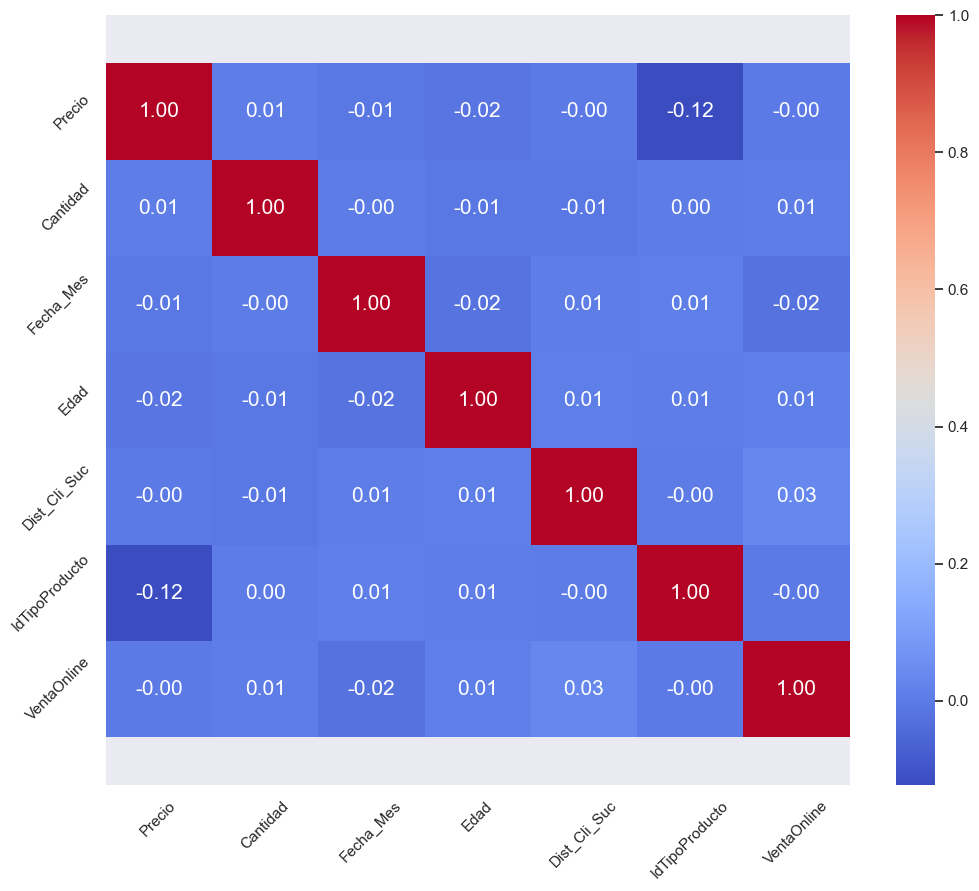

In [165]:
corr = df_venta[['Precio','Cantidad','Fecha_Mes','Edad','Dist_Cli_Suc','IdTipoProducto','VentaOnline']].corr()
plot_corre_heatmap(corr)

Se analiza la Distribucion entre venta Online y otros

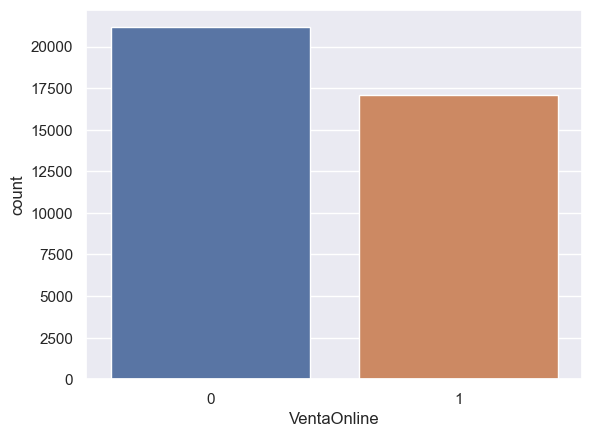

In [166]:
sns.countplot(x='VentaOnline', data=df_venta) 
plt.show()

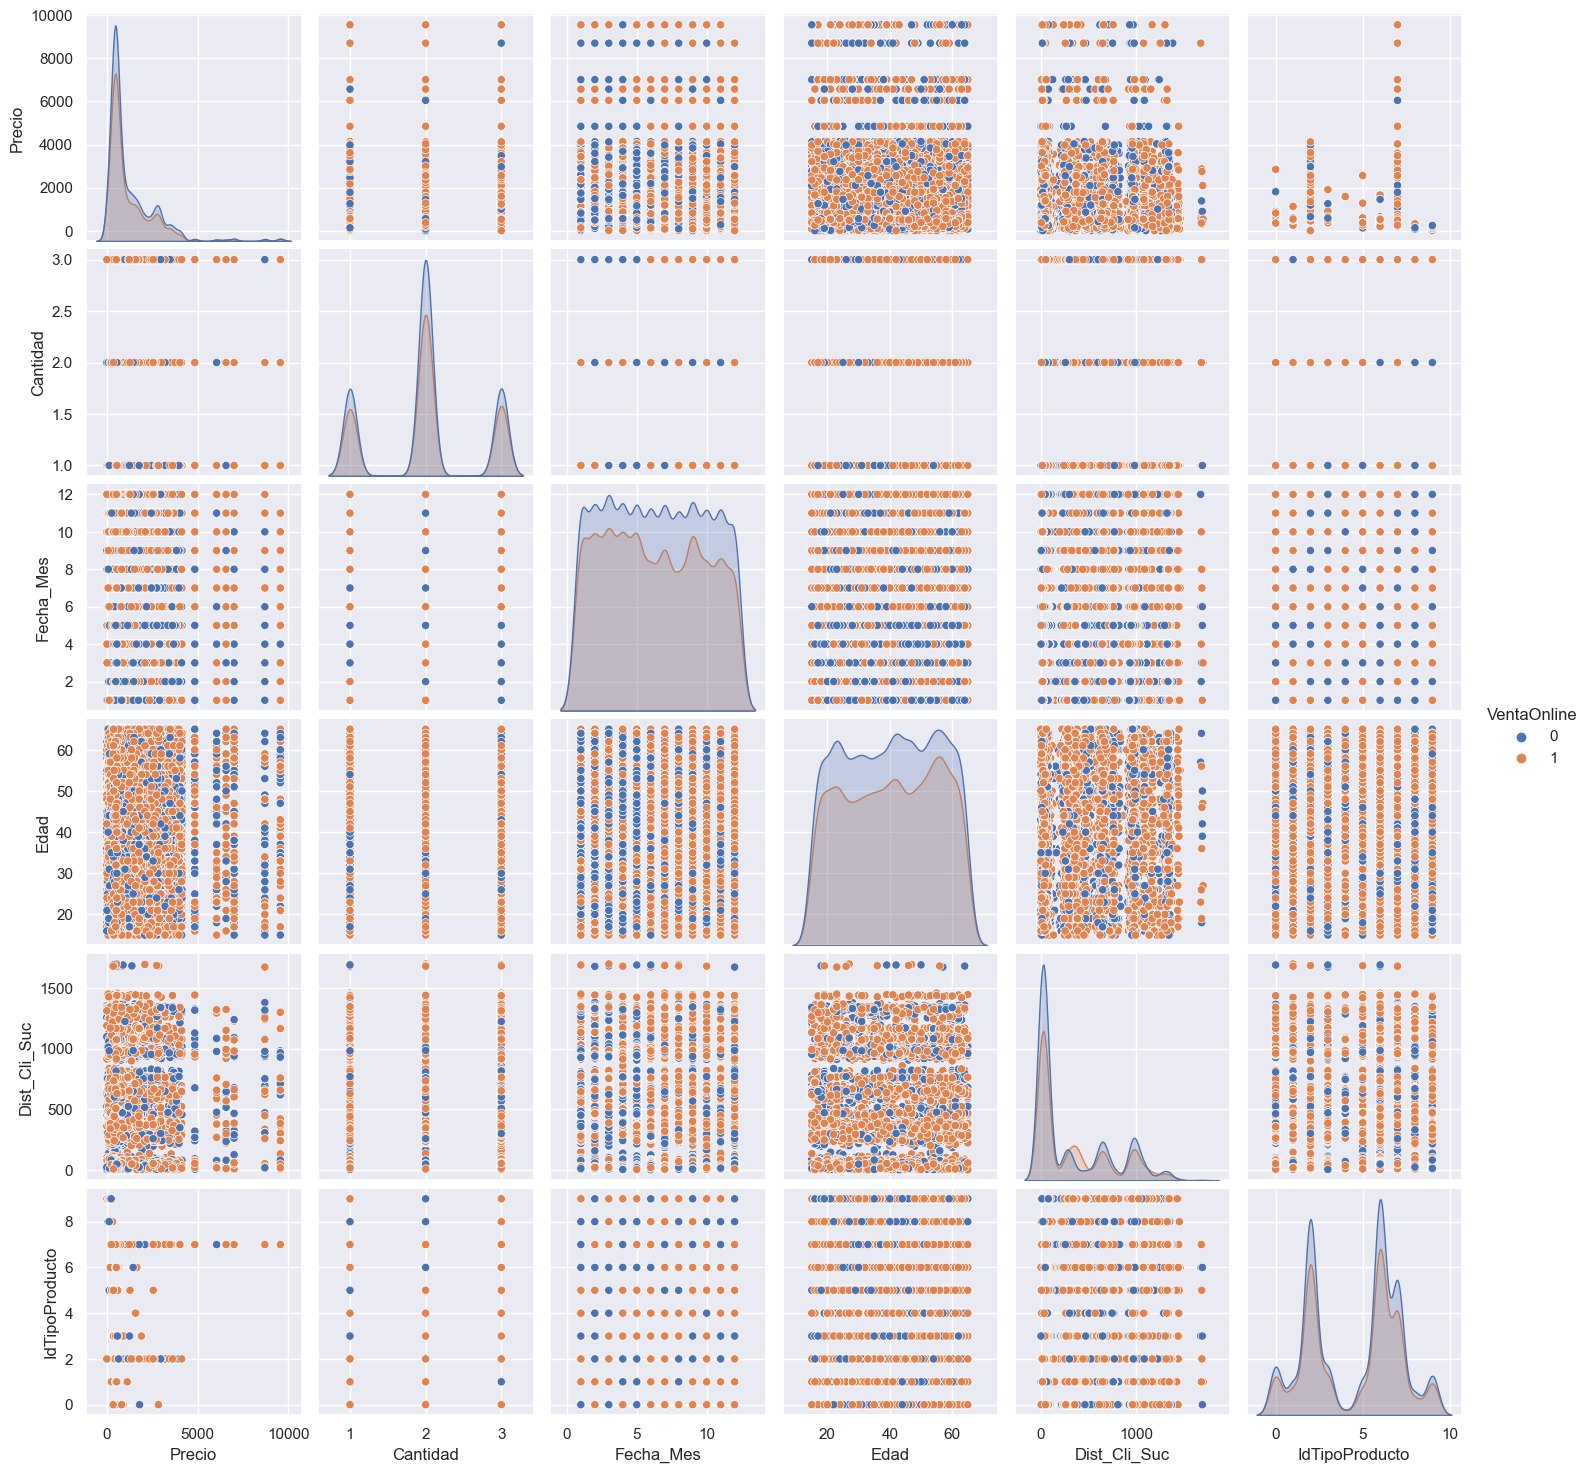

In [167]:
sns.pairplot(df_venta[['Precio','Cantidad','Fecha_Mes','Edad','Dist_Cli_Suc','IdTipoProducto','VentaOnline']], hue = 'VentaOnline')
plt.show()

Se generan los datos con los que se va a entrenar Random Forest

In [168]:
X = df_venta[['Precio','Cantidad','Fecha_Mes','Edad','Dist_Cli_Suc','IdTipoProducto']]
y = df_venta[['VentaOnline']]

In [169]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

Se evaluan distintos hiperparámetros, analizando la curva de validación y de aprendizaje

In [171]:
train_accuracy = []
test_accuracy = []
oob_scores = []

N_estimadores = [2,50,100,150,200,250,300]
i = 0
i_max = len(N_estimadores)
for estimadores in N_estimadores:
    i = i + 1
    clf = RandomForestClassifier(n_estimators=estimadores, n_jobs=-1, oob_score= True, random_state = 42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
    oob_scores.append(clf.oob_score_)
    

    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)
oob_scores = np.array(oob_scores)

C:\Users\Emanu\AppData\Local\Temp\ipykernel_9120\1300591925.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Completado: 14.29%


C:\Users\Emanu\AppData\Local\Temp\ipykernel_9120\1300591925.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Completado: 28.57%


C:\Users\Emanu\AppData\Local\Temp\ipykernel_9120\1300591925.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Completado: 42.86%


C:\Users\Emanu\AppData\Local\Temp\ipykernel_9120\1300591925.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Completado: 57.14%


C:\Users\Emanu\AppData\Local\Temp\ipykernel_9120\1300591925.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Completado: 71.43%


C:\Users\Emanu\AppData\Local\Temp\ipykernel_9120\1300591925.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Completado: 85.71%


C:\Users\Emanu\AppData\Local\Temp\ipykernel_9120\1300591925.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Completado: 100.0%


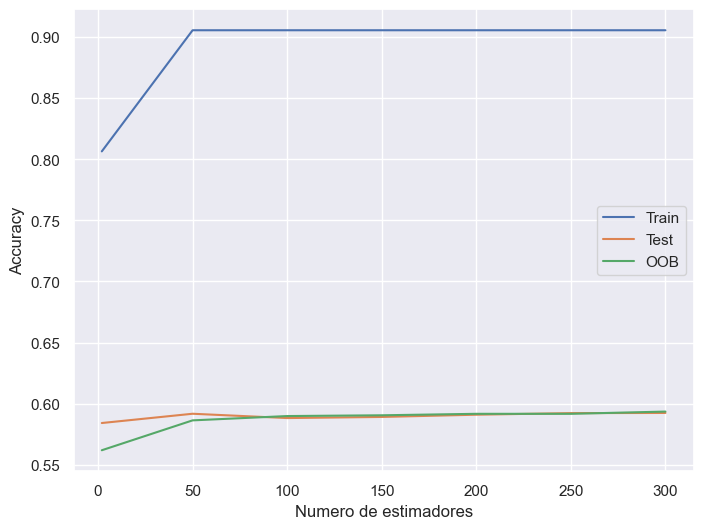

In [172]:
plt.figure(figsize = (8,6))
plt.plot(N_estimadores, train_accuracy, label = 'Train')
plt.plot(N_estimadores, test_accuracy, label = 'Test')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('Accuracy')
plt.legend()
# plt.xlim(0,50)
plt.show()

In [173]:
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1, oob_score= True, random_state = 42)

train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, y_train, 
                                                         train_sizes = np.linspace(0.0001,1,10),
                                                         scoring = 'accuracy', cv=5)

c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Emanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Emanu\AppData\Local\Programs\Py

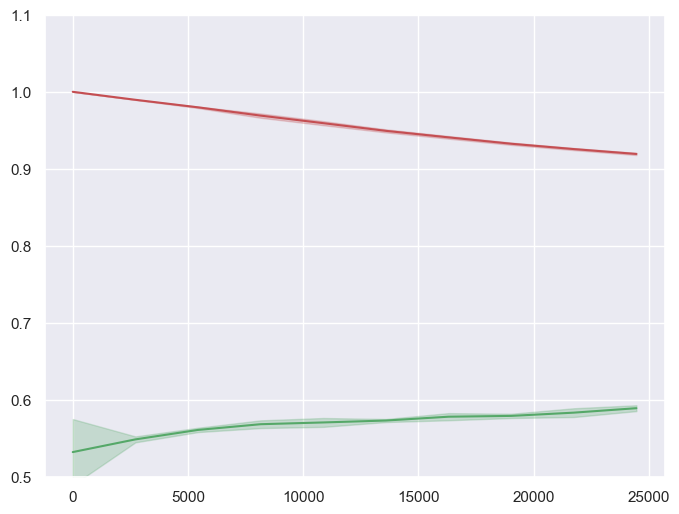

In [174]:
plt.figure(figsize = (8,6))
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'r')
plt.plot(train_sizes, valid_scores.mean(axis = 1), color = 'g')

plt.fill_between(train_sizes, train_scores.mean(axis = 1)- train_scores.std(axis = 1),
                     train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes, valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
                     valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")

plt.ylim(0.5,1.1)
plt.show()

A partir de un clasificador de 100 árboles, se realiza el entrenamiento y se observan los resultados

In [175]:
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

C:\Users\Emanu\AppData\Local\Temp\ipykernel_9120\1202341541.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [176]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9055918901242642
0.5882814543552184


In [177]:
clf.feature_importances_

array([0.22602772, 0.0780973 , 0.10113005, 0.19563421, 0.33161965,
       0.06749109])

La variable distancia entre cliente y sucursal, resulta ser la más determinante para Random Forest, seguida de Precio y Edad